# Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import matplotlib.colors as mcolors

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller, kpss 

https://docs.google.com/spreadsheets/d/1LCsxUG_XRscbDRkF1g0Hqn_AL0k93aR7/edit?usp=sharing&ouid=109163141300161595709&rtpof=true&sd=true

Скачиваем таблицы

In [ ]:
!gdown --id 1LCsxUG_XRscbDRkF1g0Hqn_AL0k93aR7

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LCsxUG_XRscbDRkF1g0Hqn_AL0k93aR7
To: /content/Mailfit — Тестовое задание на позицию аналитика.xlsx
100% 17.6k/17.6k [00:00<00:00, 15.7MB/s]


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_1 = pd.read_excel(io='Mailfit — Тестовое задание на позицию аналитика.xlsx',
                    engine='openpyxl',
                    sheet_name=['data 1_1'])
df_1 = pd.concat(df_1).reset_index(drop=True)

In [ ]:
df_2 = pd.read_excel(io='Mailfit — Тестовое задание на позицию аналитика.xlsx',
                    engine='openpyxl',
                    sheet_name=['data 1_2'])
df_2 = pd.concat(df_2).reset_index(drop=True)

# Динамика Open Rate

Для расчета показателя Open Rate воспользуемся формулой:  
$
\text{Open Rate} = \cfrac{\text{Все открытые письма}}{\text{Все доставленные письма}} * 100
$

In [ ]:
df_1['Open_Rate'] = df_1['Открытий'] / df_1['Доставлено'] * 100

Переведем столбец "Дата рассылки" в тип данных object, для удобной работе при построении графиков

In [ ]:
df_1['Date'] = df_1['Дата рассылки'].dt.date

In [ ]:
cm = sns.dark_palette("green", as_cmap=True)
df_1[['Date','Open_Rate']].style.background_gradient(cmap=cm, subset=['Open_Rate'])

,Date,Open_Rate
0,2021-06-04,12.537776
1,2021-06-07,15.870428
2,2021-06-11,12.758144
3,2021-06-14,13.500642
4,2021-06-18,12.924218
5,2021-06-21,13.033928
6,2021-06-25,13.397222
7,2021-06-28,13.044350
8,2021-07-02,15.652476
9,2021-07-05,13.725281


Получили процент открытых писем. Видим, что приблизительно с 8-9 месяца процент открытых писем начинает возрастать до конца 10 месяца. Построим график Open Rate

<ipython-input-9-61cb6ddd6de1>:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=df_1['Open_Rate'].min(), vcenter=df_1['Open_Rate'].mean(), vmax=df_1['Open_Rate'].max())


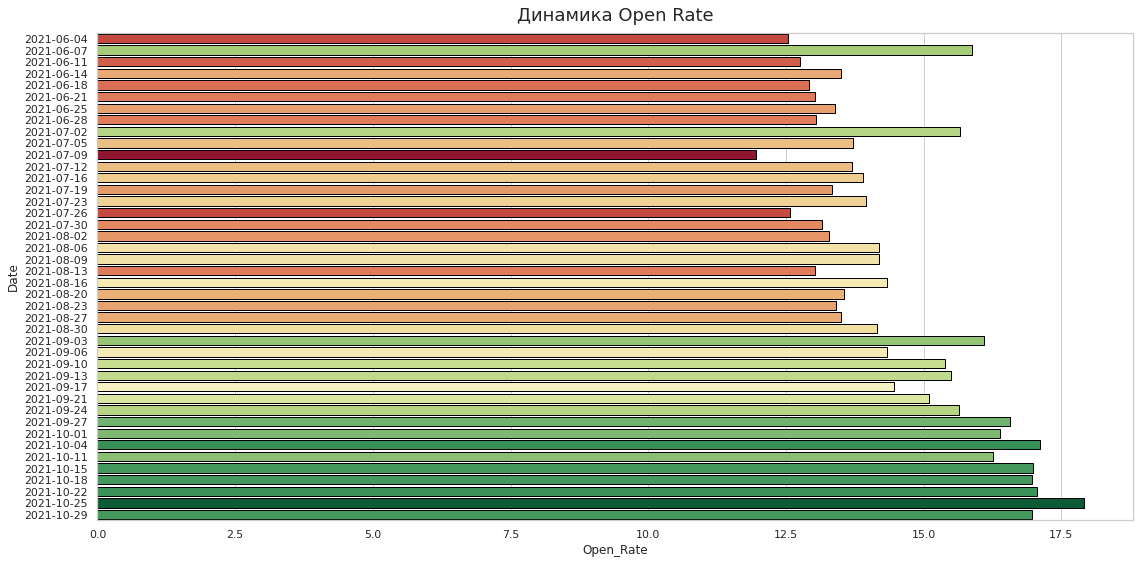

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.set(style='whitegrid', color_codes=True)
norm = DivergingNorm(vmin=df_1['Open_Rate'].min(), vcenter=df_1['Open_Rate'].mean(), vmax=df_1['Open_Rate'].max())
colors = [plt.cm.RdYlGn(norm(c)) for c in df_1['Open_Rate']]
ax = sns.barplot(x='Open_Rate', y='Date', data=df_1, palette=colors, edgecolor='black')
ax.set_title('Динамика Open Rate', fontdict={'fontsize':18}, pad=12)
plt.tight_layout()
plt.show()

На графике прекрасно видно, что начиная с 9 месяца Open_Rate начинает расти

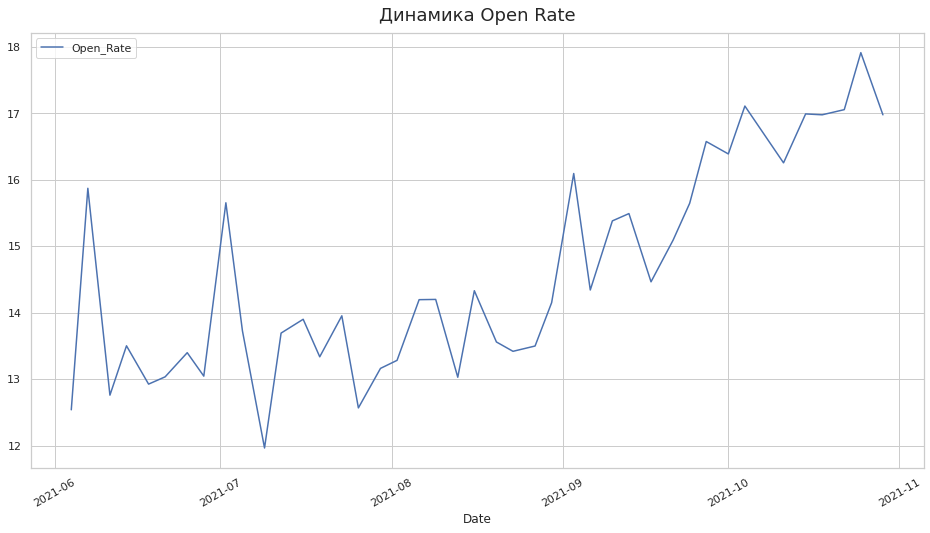

In [ ]:
ax = df_1.plot.line(x='Date', y='Open_Rate', rot=30)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Динамика Open Rate', fontdict={'fontsize':18}, pad=12)
plt.show()

# Динамика click to open rate

Чтобы посчитать метрику CTOR воспользуемся формулой:  
$
CTOR = \cfrac{CTR}{OR} * 100
$, где  
CTR - кол-во кликов  
OR - кол-во открытий писем

Соединим таблицу df_1 и df_2

In [ ]:
df_1 = df_1.merge(df_2, on = 'Тема письма', how='inner')

In [ ]:
df_1.head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,Open_Rate,Date,Кликов
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114.0,440.0,560873.0,70321.0,75.0,7613776.0,12.537776,2021-06-04,2274.0
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128.0,476.0,556910.0,88384.0,209.0,6907996.0,15.870428,2021-06-07,4549.0
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455.0,504.0,555214.0,70835.0,70.0,3558583.0,12.758144,2021-06-11,1709.0
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383.0,509.0,554144.0,74813.0,75.0,6207904.0,13.500642,2021-06-14,2136.0
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486.0,435.0,552281.0,71378.0,52.0,6905844.0,12.924218,2021-06-18,1635.0


In [ ]:
df_1['CTOR'] = df_1['Кликов'] / df_1['Открытий'] * 100

In [ ]:
df_1[['Date','CTOR']].style.background_gradient(cmap=cm, subset=['CTOR'])

,Date,CTOR
0,2021-06-04,3.233742
1,2021-06-07,5.146859
2,2021-06-11,2.412649
3,2021-06-14,2.855119
4,2021-06-18,2.290622
5,2021-06-21,3.536288
6,2021-06-25,3.125425
7,2021-06-28,2.674515
8,2021-07-02,3.181429
9,2021-07-05,2.979858


In [ ]:
df_1['CTOR'].mean()

3.1864279261962127

CTOR в основном скачет вокруг среднего значения в 3%. Однако в некоторые дни наблюдались высокие и низкие значений (выбросы) CTOR. Построим график и проанализируем данные на наличие выбросов

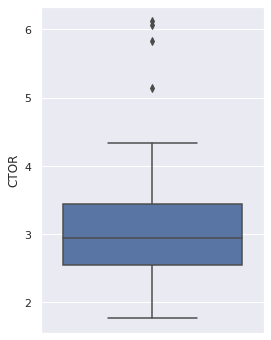

In [ ]:
sns.set(rc={"figure.figsize":(4, 6)})
sns.boxplot(y='CTOR', data=df_1)

Видим, что в наших данных присутствуют выбросы, те значения которые выше верхнего уса box plot, поэтому мы можем использовать медиану, как меру центральной тенденции

<ipython-input-17-407e84837702>:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=df_1['CTOR'].min(), vcenter=df_1['CTOR'].median(), vmax=df_1['CTOR'].max())


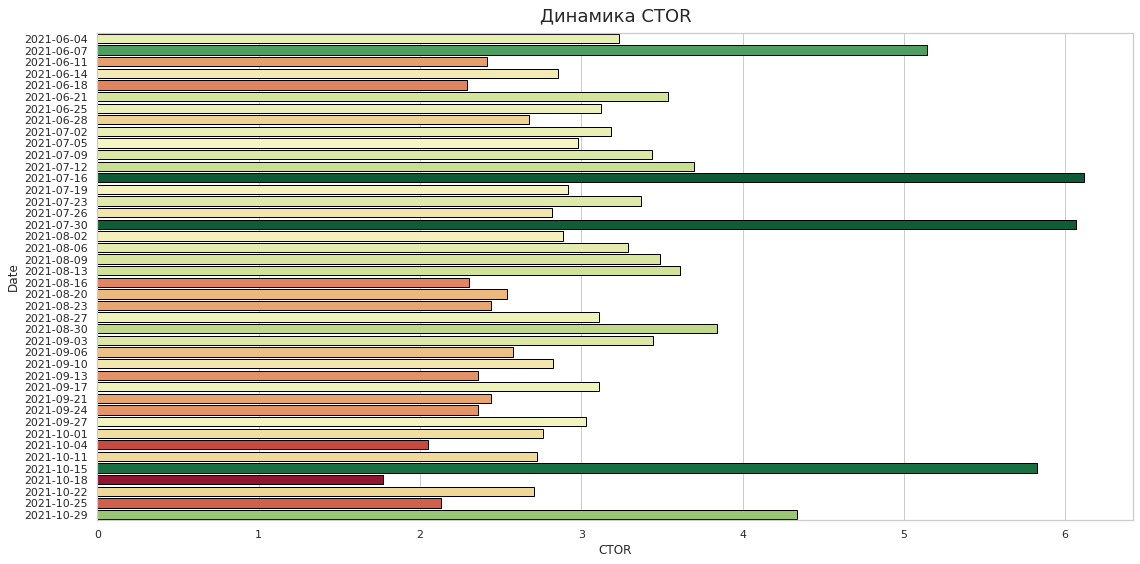

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.set(style='whitegrid', color_codes=True)
norm = DivergingNorm(vmin=df_1['CTOR'].min(), vcenter=df_1['CTOR'].median(), vmax=df_1['CTOR'].max()) 
#используем median как меру центральной тенденции
colors = [plt.cm.RdYlGn(norm(c)) for c in df_1['CTOR']]
ax = sns.barplot(x='CTOR', y='Date', data=df_1, palette=colors, edgecolor='black')
ax.set_title('Динамика CTOR', fontdict={'fontsize':18}, pad=12)
plt.tight_layout()
plt.show()

In [ ]:
df_1[:21]['CTOR'].median()

3.233742409806459

In [ ]:
df_1[21:]['CTOR'].median()

2.705776152123706

Из графика видно, что до с начало и до середины 8 месяца (08-13) был в среднем лучший показатель CTOR, чем в последующие даты

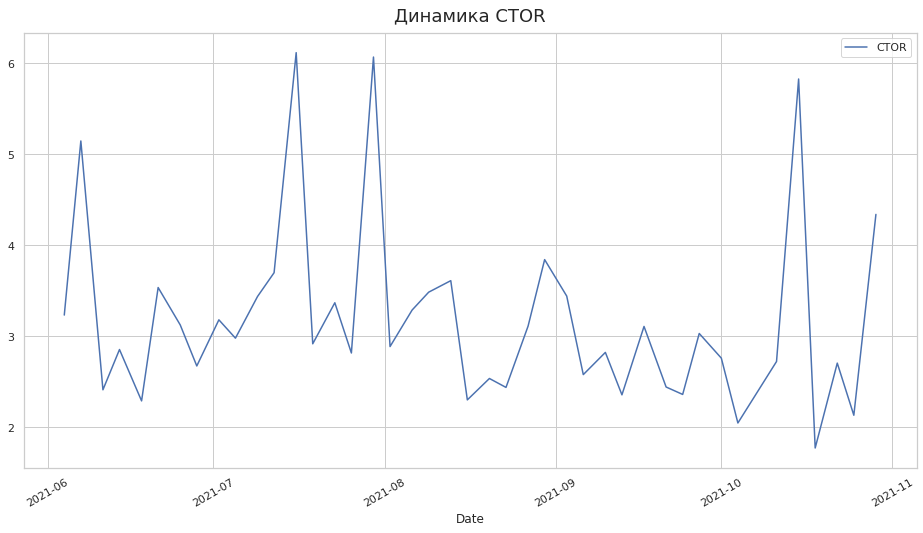

In [ ]:
ax = df_1.plot.line(x='Date', y='CTOR', rot=30)
ax.set_title('Динамика CTOR', fontdict={'fontsize':18}, pad=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Динамика Conversion rate

Чтобы найти CR воспользуемся формулой:  
$
\text{Conversion Rate} = \cfrac{\text{Все заказы}}{\text{Все клики}} * 100
$

In [ ]:
df_1['CR'] = df_1['Заказы'] / df_1['Кликов'] * 100

In [ ]:
df_1[['Date','CR']].style.background_gradient(cmap=cm, subset=['CR'])

,Date,CR
0,2021-06-04,3.298153
1,2021-06-07,4.594416
2,2021-06-11,4.095963
3,2021-06-14,3.511236
4,2021-06-18,3.180428
5,2021-06-21,4.604486
6,2021-06-25,4.608696
7,2021-06-28,5.906952
8,2021-07-02,4.405475
9,2021-07-05,5.707865


Здесь тяжело найти какие-либо закономерности, однако видно, что самые маленькие CR были в начале 6 месяца и до середины этого месяца (06.18) и на протяжении всего 10 месяца. Построим график.

<ipython-input-23-e482eff00e5c>:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=df_1['CR'].min(), vcenter=df_1['CR'].mean(), vmax=df_1['CR'].max())


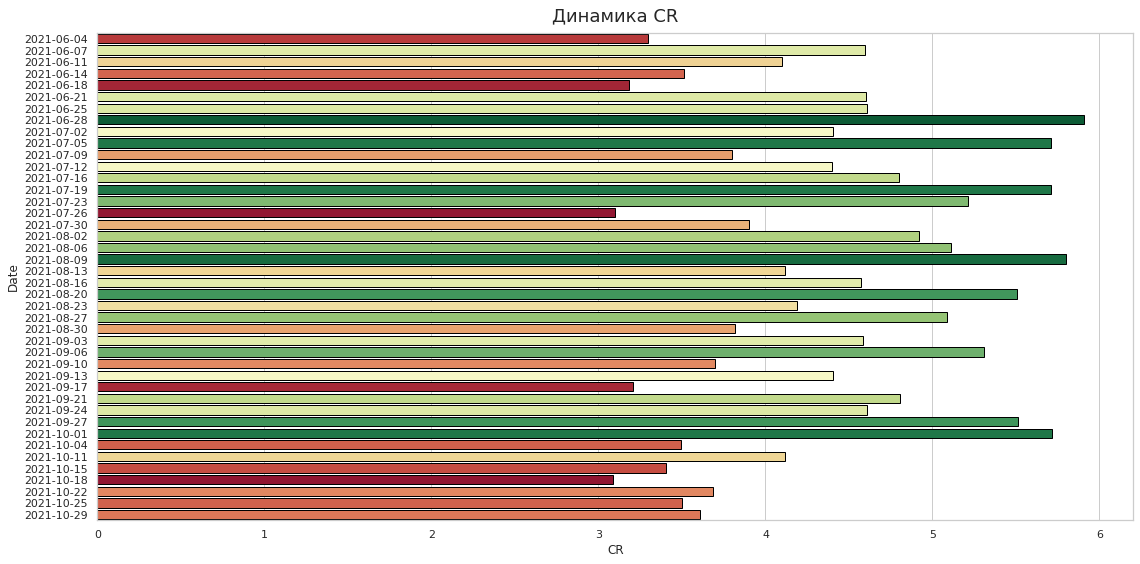

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.set(style='whitegrid', color_codes=True)
norm = DivergingNorm(vmin=df_1['CR'].min(), vcenter=df_1['CR'].mean(), vmax=df_1['CR'].max()) 
colors = [plt.cm.RdYlGn(norm(c)) for c in df_1['CR']]
ax = sns.barplot(x='CR', y='Date', data=df_1, palette=colors, edgecolor='black')
ax.set_title('Динамика CR', fontdict={'fontsize':18}, pad=12)
plt.tight_layout()
plt.show()

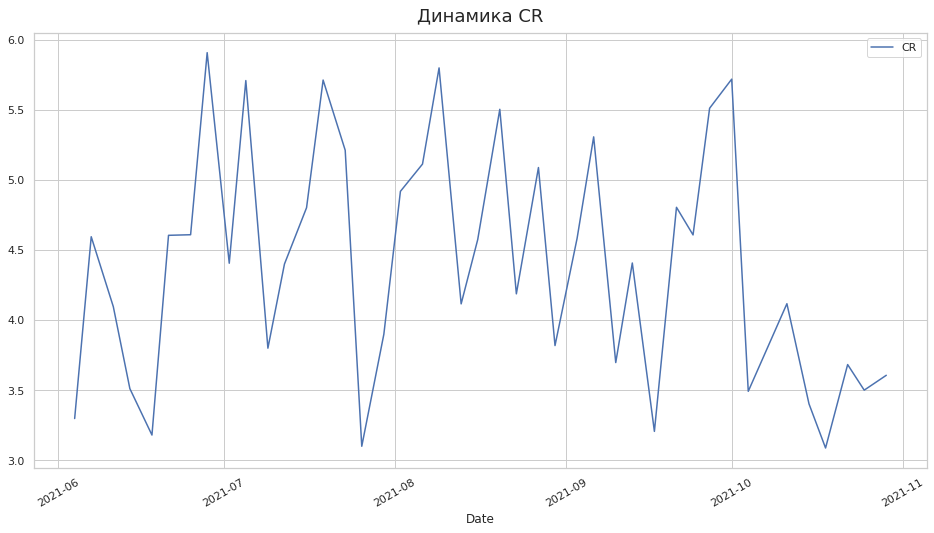

In [ ]:
ax = df_1.plot.line(x='Date', y='CR', rot=30)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Динамика CR', fontdict={'fontsize':18}, pad=12)
plt.show()

# Динамика AOV

Для вычесления AOV (средний чек) используем формулу:  
$
AOV = \cfrac{Доход}{\text{Все заказы}}
$

In [ ]:
df_1['AOV'] = df_1['Доход '] / df_1['Заказы']

In [ ]:
df_1[['Date','AOV']].style.background_gradient(cmap=cm, subset=['AOV'])

,Date,AOV
0,2021-06-04,101517.013333
1,2021-06-07,33052.612440
2,2021-06-11,50836.900000
3,2021-06-14,82772.053333
4,2021-06-18,132804.692308
5,2021-06-21,48715.760684
6,2021-06-25,72785.471698
7,2021-06-28,61132.707965
8,2021-07-02,51025.621359
9,2021-07-05,44001.401575


Тяжело сказать о каких либо тенденциях, однако в последние месяца средний чек был больше, чем в первых месяцах. Построим график тенденции

<ipython-input-29-347cd8a03556>:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=df_1['AOV'].min(), vcenter=df_1['AOV'].mean(), vmax=df_1['AOV'].max())


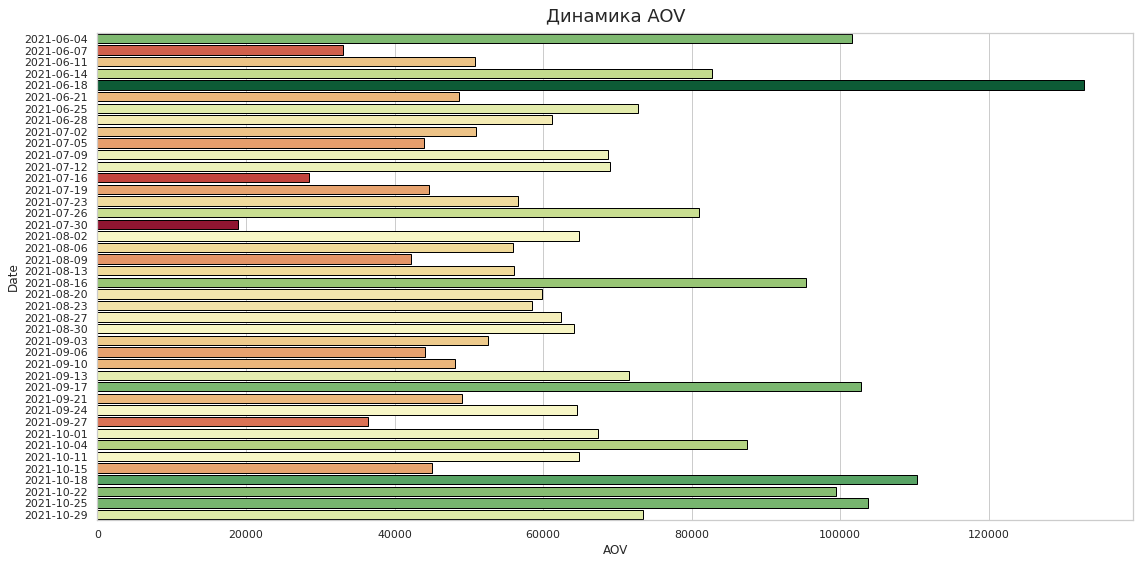

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.set(style='whitegrid', color_codes=True)
norm = DivergingNorm(vmin=df_1['AOV'].min(), vcenter=df_1['AOV'].mean(), vmax=df_1['AOV'].max()) 
colors = [plt.cm.RdYlGn(norm(c)) for c in df_1['AOV']]
ax = sns.barplot(x='AOV', y='Date', data=df_1, palette=colors, edgecolor='black')
ax.set_title('Динамика AOV', fontdict={'fontsize':18}, pad=12)
plt.tight_layout()
plt.show()

In [ ]:
df_1[:21]['AOV'].mean()

60241.39583709739

In [ ]:
df_1[21:]['AOV'].mean()

69570.51487245459

Да, на графике видно, что во второй половине средний чек был больше. Также это видно, если разделить график пополам и посмотреть на среднее значение

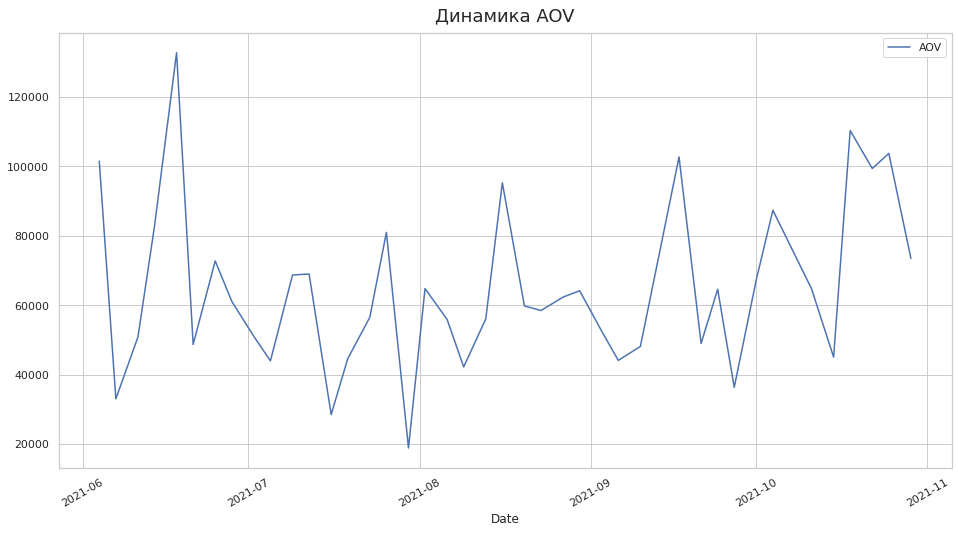

In [ ]:
ax = df_1.plot.line(x='Date', y='AOV', rot=30)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Динамика AOV', fontdict={'fontsize':18}, pad=12)
plt.show()

# Топ лучших тем по Open Rate

Выведим топ 10 тем для которых значение Open Rate принимает самые большие значения

In [ ]:
df_1[['Тема письма','Open_Rate']].sort_values(by='Open_Rate', ascending=False).head(10)

,Тема письма,Open_Rate
40,Тема41,17.911178
35,Тема36,17.107816
39,Тема40,17.053729
37,Тема38,16.989302
38,Тема39,16.976136
41,Тема42,16.975781
33,Тема34,16.574275
34,Тема35,16.387509
36,Тема37,16.253290
26,Тема27,16.092827


Самые популярные темы это: Тема41, Тема36, Тема40, Тема38, Тема39

# Лучший день недели для отправки письма

Будем исходить из того, что для лучшего дня для отправки писем, будет браться во внимание метрика OR (процент открытых писем)

In [ ]:
df_1['Day_Name'] = df_1['Дата рассылки'].dt.day_name()

In [ ]:
df_1.groupby('Day_Name')['Open_Rate'].agg(['count','mean','median']).sort_values(by='mean', ascending=False)

,count,mean,median
Day_Name,,,
Tuesday,1,15.090783,15.090783
Monday,20,14.639951,14.174135
Friday,21,14.452926,13.952056


Видим, что во вторник достигается самый большой OR, однако наблюдений слишком мало (1 наблюдение), чтобы можно уверенно сделать вывод о том, что вторник является лучшим днем для отправки письма. Следующий день это понедельник со средним OR = 14.6% 

# Динамика оттока базы

Будем считать за базу пользователей число отправленных писем т.к. если мы их отправляем значит знаем email.  
Для подсчета оттока воспользуемся формулой:  
$
\text{Churn Rate} = \cfrac{\text{Отписки}}{\text{Отправлено писем}} * 100
$

In [ ]:
df_1['Churn_Rate'] = df_1['Отписки'] / df_1['Отправлено писем'] * 100

In [ ]:
cm = sns.dark_palette("red", as_cmap=True)
df_1[['Date','Churn_Rate']].style.background_gradient(cmap=cm, subset=['Churn_Rate'])

,Date,Churn_Rate
0,2021-06-04,0.078415
1,2021-06-07,0.085438
2,2021-06-11,0.090736
3,2021-06-14,0.091814
4,2021-06-18,0.078735
5,2021-06-21,0.091932
6,2021-06-25,0.079162
7,2021-06-28,0.093398
8,2021-07-02,0.089397
9,2021-07-05,0.090039


Тяжело заметить какие-либо тенденции. Построим графики

<ipython-input-38-bdbedd27981c>:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=df_1['Churn_Rate'].min(), vcenter=df_1['Churn_Rate'].mean(), vmax=df_1['Churn_Rate'].max())


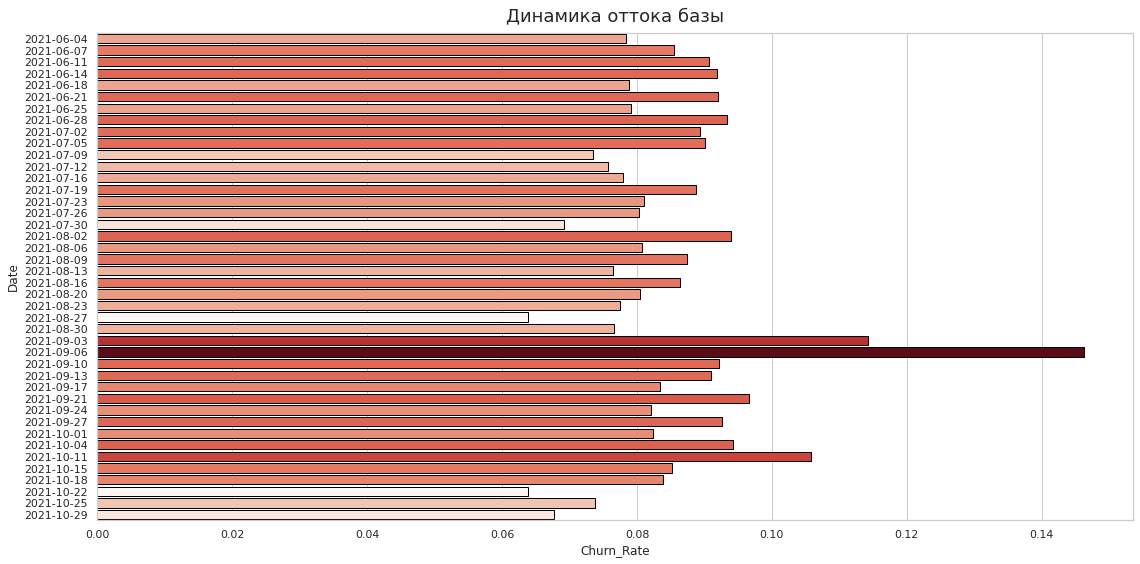

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.set(style='whitegrid', color_codes=True)
norm = DivergingNorm(vmin=df_1['Churn_Rate'].min(), vcenter=df_1['Churn_Rate'].mean(), vmax=df_1['Churn_Rate'].max())
colors = [plt.cm.Reds(norm(c)) for c in df_1['Churn_Rate']]
ax = sns.barplot(x='Churn_Rate', y='Date', data=df_1, palette=colors, edgecolor='black')
ax.set_title('Динамика оттока базы', fontdict={'fontsize':18}, pad=12)
plt.tight_layout()
plt.show()

Видим, что относительно сильный отток клиентов происходил с 9 до середины 10 месяца

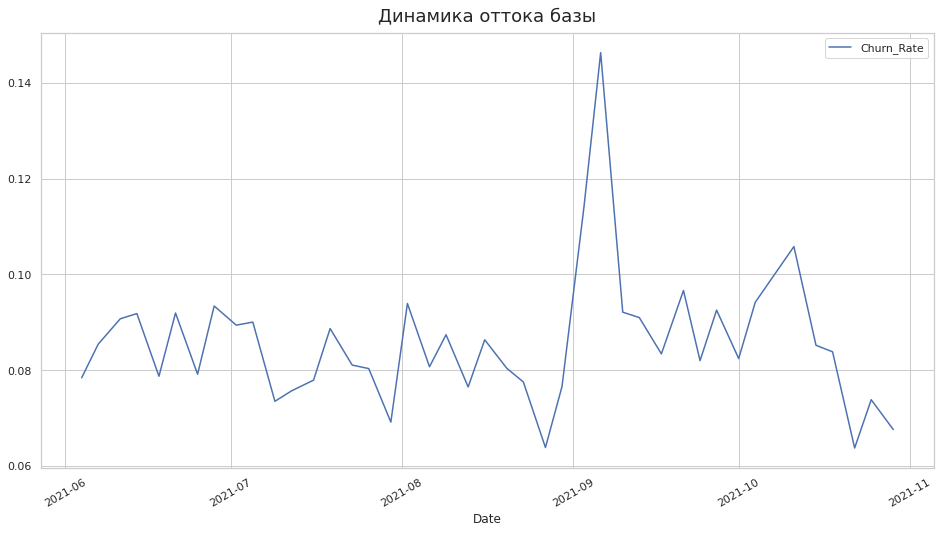

In [ ]:
ax = df_1.plot.line(x='Date', y='Churn_Rate', rot=30)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Динамика оттока базы', fontdict={'fontsize':18}, pad=12)
plt.show()